In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('1dsmallresults.csv')
df.sample(3)

,gname,family,nodes,edges,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
86,dwt_346.mtx,structural proble,346,2880,8,7,8,7,9,7,8,7,8.4
112,Harvard500.mtx,directed grap,500,5126,21,21,21,21,21,21,21,21,21.0
36,cage_G_19.mtx,not available,58,174,4,4,4,3,4,4,3,4,4.0


In [42]:
df_opt = pd.read_csv('1d_small.csv')
df_opt.drop(["family", "nodes", "edges"], axis=1, inplace=True)
df_opt.sample(3)

,gname,optimal
137,bcsstk05.mtx,9
118,tumorAntiAngiogenesis_3.mtx,4
161,dwt_419.mtx,5


In [43]:
df = df.merge(df_opt, on="gname", left_index=True)
df.sample(10)

,gname,family,nodes,edges,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random,optimal
85,cage_G_17.mtx,not available,58,174,3,3,3,4,3,3,4,3,3.4,3
40,poisson2D.mtx,computational fluid dynamics proble,367,4100,6,6,6,5,6,6,6,6,6.0,4
6,mcca.mtx,2D/3D proble,180,4958,34,34,34,34,34,34,34,34,34.2,34
179,lshp_265.mtx,thermal proble,265,1488,6,5,5,4,6,6,5,6,5.8,4
76,cage_G_08.mtx,not available,58,174,3,3,3,4,3,3,4,3,3.8,3
33,Trefethen_500.mtx,combinatorial proble,500,7978,5,10,7,6,5,7,6,3,10.0,3
13,bwm200.mtx,chemical process simulation proble,200,1192,2,2,2,2,2,4,2,2,4.0,2
65,qc324.mtx,electromagnetics proble,324,26406,82,82,82,82,82,82,82,82,81.2,81
50,Harvard500.mtx,directed grap,500,5126,21,21,21,21,21,21,21,21,21.0,21
135,bcsstk03.mtx,structural proble,112,528,4,4,4,4,5,4,5,4,5.8,4


In [44]:
orderings = df.drop(["gname", "family", "nodes", "edges"], axis=1)
orderings.sample(3)

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random,optimal
174,19,19,19,19,22,24,19,19,20.6,19
145,4,5,5,5,5,6,5,4,7.0,4
19,4,5,4,5,5,4,4,5,5.0,3


In [45]:
orderings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 125 to 171
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   degree1     192 non-null    int64  
 1   degree2     192 non-null    int64  
 2   degree3     192 non-null    int64  
 3   closeness   192 non-null    int64  
 4   clustering  192 non-null    int64  
 5   pagerank    192 non-null    int64  
 6   weighted    192 non-null    int64  
 7   uniform     192 non-null    int64  
 8   random      192 non-null    float64
 9   optimal     192 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 16.5 KB


In [47]:
orderings = df[["degree1", "degree2", "degree3", "closeness", "clustering", "pagerank", "weighted", "uniform", "random"]].div(df["optimal"].values, axis=0)
orderings

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
125,1.333333,1.333333,1.000000,1.00,1.333333,1.333333,1.000000,1.333333,1.466667
181,1.200000,1.400000,1.200000,1.40,1.400000,1.200000,1.400000,1.400000,1.600000
68,1.000000,1.000000,1.066667,1.00,1.000000,1.000000,1.000000,1.066667,1.013333
67,1.166667,1.000000,1.166667,1.00,1.166667,1.000000,1.166667,1.166667,1.200000
126,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.150000
...,...,...,...,...,...,...,...,...,...
20,1.250000,1.250000,1.500000,1.25,1.500000,1.250000,1.250000,1.500000,1.600000
21,1.200000,1.400000,1.200000,1.40,1.400000,1.200000,1.200000,1.600000,1.640000
22,1.500000,1.500000,1.750000,1.50,2.000000,1.500000,1.500000,1.500000,1.750000
23,1.500000,1.500000,1.250000,1.75,1.750000,1.750000,1.500000,1.500000,1.700000


In [55]:
orderings.corr()

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
degree1,1.000000,0.665664,0.716080,0.686820,0.773470,0.586520,0.727426,0.632126,0.154081
degree2,0.665664,1.000000,0.786447,0.654923,0.689191,0.552349,0.571919,0.509135,0.216601
degree3,0.716080,0.786447,1.000000,0.762708,0.642034,0.402792,0.732707,0.664120,0.060453
closeness,0.686820,0.654923,0.762708,1.000000,0.539657,0.435686,0.836281,0.525226,0.100360
clustering,0.773470,0.689191,0.642034,0.539657,1.000000,0.606851,0.541642,0.611457,0.183468
pagerank,0.586520,0.552349,0.402792,0.435686,0.606851,1.000000,0.494154,0.202862,0.420075
weighted,0.727426,0.571919,0.732707,0.836281,0.541642,0.494154,1.000000,0.381017,0.176743
uniform,0.632126,0.509135,0.664120,0.525226,0.611457,0.202862,0.381017,1.000000,-0.145767
random,0.154081,0.216601,0.060453,0.100360,0.183468,0.420075,0.176743,-0.145767,1.000000


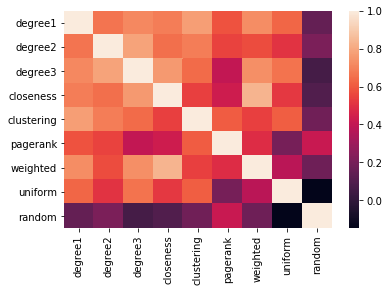

In [54]:
sns.heatmap(orderings.corr())

In [48]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(orderings.values)
orderings_minmax = pd.DataFrame(x_scaled, columns=orderings.columns)
orderings_minmax.sample(3)

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
146,0.000000,0.142857,0.12500,0.166667,0.1,0.000000,0.100,0.333333,0.157143
172,0.333333,0.285714,0.00000,0.000000,0.8,0.833333,0.000,0.000000,0.857143
70,0.125000,0.160714,0.28125,0.250000,0.3,0.125000,0.075,0.375000,0.235714


In [49]:
orderings_minmax.corr()

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
degree1,1.000000,0.665664,0.716080,0.686820,0.773470,0.586520,0.727426,0.632126,0.154081
degree2,0.665664,1.000000,0.786447,0.654923,0.689191,0.552349,0.571919,0.509135,0.216601
degree3,0.716080,0.786447,1.000000,0.762708,0.642034,0.402792,0.732707,0.664120,0.060453
closeness,0.686820,0.654923,0.762708,1.000000,0.539657,0.435686,0.836281,0.525226,0.100360
clustering,0.773470,0.689191,0.642034,0.539657,1.000000,0.606851,0.541642,0.611457,0.183468
pagerank,0.586520,0.552349,0.402792,0.435686,0.606851,1.000000,0.494154,0.202862,0.420075
weighted,0.727426,0.571919,0.732707,0.836281,0.541642,0.494154,1.000000,0.381017,0.176743
uniform,0.632126,0.509135,0.664120,0.525226,0.611457,0.202862,0.381017,1.000000,-0.145767
random,0.154081,0.216601,0.060453,0.100360,0.183468,0.420075,0.176743,-0.145767,1.000000


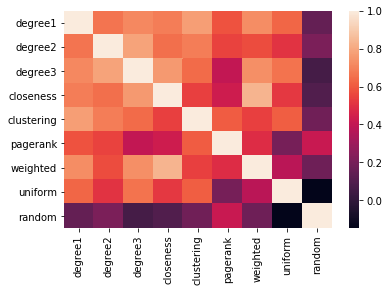

In [50]:
sns.heatmap(orderings_minmax.corr())

In [51]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
x_scaled = std_scaler.fit_transform(orderings.values)
orderings_std = pd.DataFrame(x_scaled, columns=orderings.columns)
orderings_std.sample(3)

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
64,-0.840247,0.153995,0.275337,0.298018,-0.034796,0.606368,0.221773,-0.895492,0.365587
185,0.284095,0.153995,1.417327,0.298018,0.870448,-0.105594,0.221773,1.405434,-0.060468
71,0.159168,0.046823,-0.359102,0.171810,-0.537710,-0.184701,-0.336548,0.127142,-0.380009


In [52]:
orderings_std.corr()

,degree1,degree2,degree3,closeness,clustering,pagerank,weighted,uniform,random
degree1,1.000000,0.665664,0.716080,0.686820,0.773470,0.586520,0.727426,0.632126,0.154081
degree2,0.665664,1.000000,0.786447,0.654923,0.689191,0.552349,0.571919,0.509135,0.216601
degree3,0.716080,0.786447,1.000000,0.762708,0.642034,0.402792,0.732707,0.664120,0.060453
closeness,0.686820,0.654923,0.762708,1.000000,0.539657,0.435686,0.836281,0.525226,0.100360
clustering,0.773470,0.689191,0.642034,0.539657,1.000000,0.606851,0.541642,0.611457,0.183468
pagerank,0.586520,0.552349,0.402792,0.435686,0.606851,1.000000,0.494154,0.202862,0.420075
weighted,0.727426,0.571919,0.732707,0.836281,0.541642,0.494154,1.000000,0.381017,0.176743
uniform,0.632126,0.509135,0.664120,0.525226,0.611457,0.202862,0.381017,1.000000,-0.145767
random,0.154081,0.216601,0.060453,0.100360,0.183468,0.420075,0.176743,-0.145767,1.000000


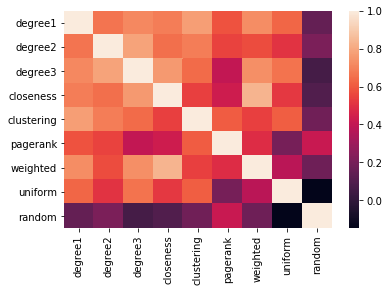

In [53]:
sns.heatmap(orderings_std.corr())